In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import SubplotZero
import numpy as np
import seaborn as sns

plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 16

# Max Distance policy
$$\Phi_{md} = \tanh \left(\frac{-\alpha\, e^{x\,\beta}}{\gamma}\right)\gamma$$

Text(0.2, -2, '$\\displaystyle f = \\tanh\\left( \\frac{-\\alpha e^{z \\beta}}{\\gamma} \\right)\\gamma $')

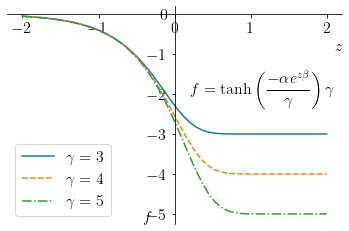

In [2]:
md_phi_g_fig, md_phi_g_ax = plt.subplots()
x = np.linspace(-2,2)
alpha = 3
beta = 2
gamma = 3
phi = lambda x: np.tanh((-alpha*np.exp(x*beta))/gamma)*gamma
md_phi_g_ax.plot(x, phi(x), label=f"$\\gamma = {gamma}$")
gamma = 4
md_phi_g_ax.plot(x, phi(x), linestyle='--', label=f'$\\gamma = {gamma}$')
gamma = 5
md_phi_g_ax.plot(x, phi(x), linestyle='-.', label=f'$\\gamma = {gamma}$')

sns.despine(ax=md_phi_g_ax, offset=0)
md_phi_g_ax.set_xlabel('$z$', loc='right')
md_phi_g_ax.set_ylabel('$f$', loc='bottom', rotation='horizontal')
md_phi_g_ax.spines['left'].set_position('zero')
md_phi_g_ax.spines['bottom'].set_position('zero')
md_phi_g_ax.legend(loc='lower left')
md_phi_g_ax.text(0.2,-2, r"$\displaystyle f = \tanh\left( \frac{-\alpha e^{z \beta}}{\gamma} \right)\gamma $")

Text(0.2, -1.5, '$\\displaystyle f = \\tanh\\left( \\frac{-\\alpha e^{z \\beta}}{\\gamma} \\right)\\gamma $')

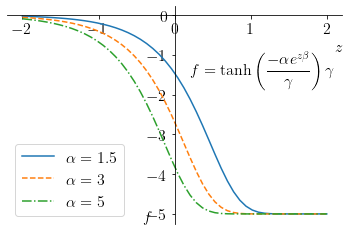

In [3]:
md_phi_a_fig, md_phi_a_ax = plt.subplots()
x = np.linspace(-2,2)
alpha = 1.5
beta = 2
gamma = 5
phi = lambda x: np.tanh((-alpha*np.exp(x*beta))/gamma)*gamma
md_phi_a_ax.plot(x, phi(x), label=f"$\\alpha = {alpha}$")
alpha = 3
md_phi_a_ax.plot(x, phi(x), linestyle='--', label=f'$\\alpha = {alpha}$')
alpha = 5
md_phi_a_ax.plot(x, phi(x), linestyle='-.', label=f'$\\alpha = {alpha}$')

sns.despine(ax=md_phi_a_ax, offset=0)
md_phi_a_ax.set_xlabel('$z$', loc='right')
md_phi_a_ax.set_ylabel('$f$', loc='bottom', rotation='horizontal')
md_phi_a_ax.spines['left'].set_position('zero')
md_phi_a_ax.spines['bottom'].set_position('zero')
md_phi_a_ax.legend(loc='lower left')
md_phi_a_ax.text(0.2,-1.5, r"$\displaystyle f = \tanh\left( \frac{-\alpha e^{z \beta}}{\gamma} \right)\gamma $")

Text(0.2, -1.5, '$\\displaystyle f = \\tanh\\left( \\frac{-\\alpha e^{z \\beta}}{\\gamma} \\right)\\gamma $')

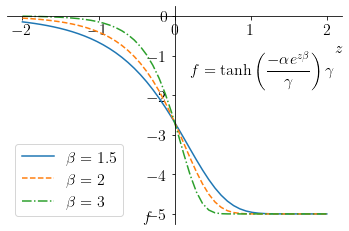

In [4]:
md_phi_b_fig, md_phi_b_ax = plt.subplots()
x = np.linspace(-2,2)
alpha = 3
beta = 1.5
gamma = 5
phi = lambda x: np.tanh((-alpha*np.exp(x*beta))/gamma)*gamma
md_phi_b_ax.plot(x, phi(x), label=f"$\\beta = {beta}$")
beta = 2
md_phi_b_ax.plot(x, phi(x), linestyle='--', label=f'$\\beta = {beta}$')
beta = 3
md_phi_b_ax.plot(x, phi(x), linestyle='-.', label=f'$\\beta = {beta}$')

sns.despine(ax=md_phi_b_ax, offset=0)
md_phi_b_ax.set_xlabel('$z$', loc='right')
md_phi_b_ax.set_ylabel('$f$', loc='bottom', rotation='horizontal')
md_phi_b_ax.spines['left'].set_position('zero')
md_phi_b_ax.spines['bottom'].set_position('zero')
md_phi_b_ax.legend(loc='lower left')
md_phi_b_ax.text(0.2,-1.5, r"$\displaystyle f = \tanh\left( \frac{-\alpha e^{z \beta}}{\gamma} \right)\gamma $")

# Obstacle avoidance
$$z = \psi_{oa}(\mathbf{x}, \dot{\mathbf{x}})=\frac{\|\mathbf{x}-\mathbf{c}\|}{d_s}-1$$

$$w(z) = \frac{1}{z^4}$$

$$\Phi_{oa}(z) = \frac{1}{2} \alpha_{oa} w(z)^2$$

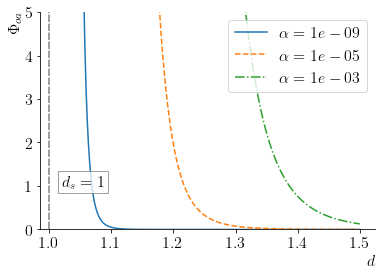

In [7]:
c = 0
ds = 1
alpha=1e-5
z = lambda x: (np.linalg.norm(x-c)/ds) - 1
w = lambda z: 1/np.power(z,4)
phi = lambda z: (1/2) * alpha * w(z)**2

xs = np.linspace(1.01, 1.5, num=250)
zs = [z(x) for x in xs]
oa_alpha_fig, oa_alpha_ax = plt.subplots()
oa_alpha_ax.set_ylim([0,5])

alpha_list = [1e-9, 1e-5, 1e-3]
styles = ['-','--', '-.']
for i in range(len(alpha_list)):
    alpha = alpha_list[i]
    oa_alpha_ax.plot(xs, [phi(z) for z in zs], label=f"$\\alpha = {alpha:.0e}$", linestyle=styles[i])

#alpha = 1e-6
#oa_alpha_ax.plot(xs, [phi(z) for z in zs], label=f"$\\alpha = {alpha:.0e}$")
#alpha = 1e-5
#oa_alpha_ax.plot(xs, [phi(z) for z in zs], label=f"$\\alpha = {alpha:.0e}$")
#alpha = 1e-4
#oa_alpha_ax.plot(xs, [phi(z) for z in zs], label=f"$\\alpha = {alpha:.0e}$")
oa_alpha_ax.axvline(1, color='k', alpha=0.5, linestyle=(0,(5,1)))
t = oa_alpha_ax.annotate(f'$d_s={ds}$', [ds+0.02,1], color='k', alpha=1)
t.set_bbox(dict(facecolor=(1,1,1), alpha=0.75, edgecolor=(0.5,0.5,0.5)))

oa_alpha_ax.legend()

# Format axes
sns.despine(ax=oa_alpha_ax, offset=0)
oa_alpha_ax.set_xlabel('$d$', loc='right')
oa_alpha_ax.set_ylabel('$\\Phi_{{oa}}$', loc='top')
#oa_alpha_ax.set_ylabel('$\\Phi_{{oa}}(\\psi_{{oa}}\\left(\\mathbf{{x}}, \dot{{\\mathbf{{x}}}})\\right)$', loc='top')
#oa_ds_ax.spines['left'].set_position('zero')
oa_alpha_ax.spines['bottom'].set_position('zero')

plt.show()

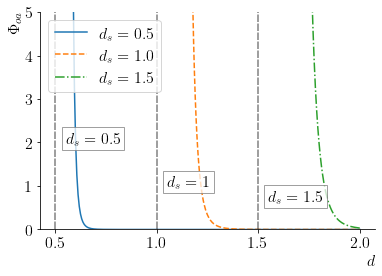

In [6]:
c = 0
ds = 1
alpha=1e-5
z = lambda x: (np.linalg.norm(x-c)/ds) - 1
w = lambda z: 1/np.power(z,4)
phi = lambda z: (1/2) * alpha * w(z)**2

xs = np.linspace(ds+0.01, 2, num=250)
zs = [z(x) for x in xs]
oa_ds_fig, oa_ds_ax = plt.subplots()

ds_list = [0.5, 1, 1.5]
styles = ['-','--','-.']
for i in range(len(ds_list)):
    oa_ds_ax.set_ylim([0,5])
    ds = ds_list[i]
    xs = np.linspace(ds+0.01, 2, num=250)
    zs = [z(x) for x in xs]
    line, = oa_ds_ax.plot(xs, [phi(z) for z in zs], label=f"$d_s = {ds:.1f}$", linestyle=styles[i])
    t = oa_ds_ax.annotate(f'$d_s={ds}$', [ds+0.05,1/ds], color='k', alpha=1)
    t.set_bbox(dict(facecolor=(1,1,1), alpha=0.75, edgecolor=(0.5,0.5,0.5)))
    oa_ds_ax.axvline(ds, color='k', alpha=0.5, linestyle=(0,(5,1)))

oa_ds_ax.legend()

# Format axis lines
sns.despine(ax=oa_ds_ax, offset=0)
oa_ds_ax.set_xlabel('$d$', loc='right')
oa_ds_ax.set_ylabel('$\\Phi_{{oa}}$', loc='top')
#oa_ds_ax.set_ylabel('$\\Phi_{{oa}}(\\psi_{{oa}}\\left(\\mathbf{{x}}, \dot{{\\mathbf{{x}}}})\\right)$', loc='top')
#oa_ds_ax.spines['left'].set_position('zero')
oa_ds_ax.spines['bottom'].set_position('zero')
plt.show()


# Goal attraction
$$\tilde{\Phi}(\mathbf{x})=\|\mathbf{x}\|+\frac{1}{\eta} \log\left( 1 + e^{-2\eta\|\mathbf{x}\|} \right)$$

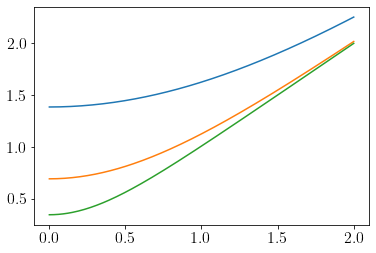

In [ ]:
#"goal_attractor":{
#        "alpha": 1,
#        "gain": 1,  
#        "eta": 2
#    },

eta = 1
etas = [0.5, 1, 2]
stepsize=0.01
xs = np.linspace(1e-3, 2, num=200)
phi = lambda x: np.linalg.norm(x)+ (1/eta) * np.log(1 + np.exp(-2*eta*np.linalg.norm(x)))
ga_pot_eta_fig, ga_pot_eta_ax = plt.subplots()
for i in range(len(etas)):
    eta=etas[i]
    potential = [phi(x) for x in xs]
    ga_pot_eta_ax.plot(xs, potential)
plt.show()

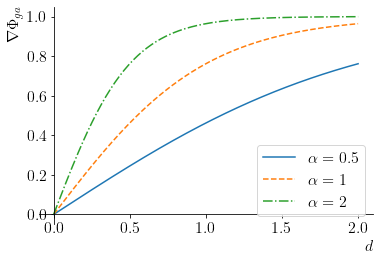

In [8]:
alpha = 1
xs = np.linspace(1e-3, 2, num=200)
grad_phi = lambda x: (1-np.exp(-2 * alpha*np.linalg.norm(x)))/(1+np.exp(-2*alpha*np.linalg.norm(x)))*x/np.linalg.norm(x)

alphas = [0.5, 1, 2]
styles = ['-', '--', '-.']

g_alpha_fig, g_alpha_ax = plt.subplots()
for i in range(len(alphas)):
    alpha = alphas[i]
    grad = [grad_phi(x) for x in xs]
    line, = g_alpha_ax.plot(xs, grad, label=f"$\\alpha = {alpha}$", linestyle=styles[i])

g_alpha_ax.legend()
sns.despine(ax=g_alpha_ax, offset=0)
g_alpha_ax.set_xlabel('$d$', loc='right')
g_alpha_ax.set_ylabel(f'$$\\nabla \\Phi_{{ga}}$$', loc='top')
g_alpha_ax.spines['left'].set_position('zero')
g_alpha_ax.spines['bottom'].set_position('zero')
plt.show()

## Inertial matrix for goal attraction

$$w(\mathbf{x})=\gamma(x)w_u + (1-\gamma(\mathbf{x}))w_l$$
$$0\leq w_l \leq w_u$$
$$\gamma(\mathbf{x}) = \exp \left( -\frac{\|\mathbf{x}\|^2}{2\sigma_\gamma^2} \right)$$

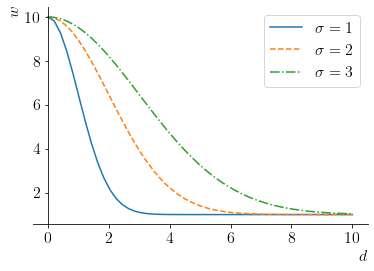

In [9]:
w_u = 10
w_l = 1
sigma = 1
gamma = lambda x: np.exp(-1*(np.linalg.norm(x)**2)/(2*sigma**2))
w = lambda x: gamma(x)*w_u + (1-gamma(x))*w_l
xs = np.linspace(0, 10)
ga_w_sigma_fig, ga_w_sigma_ax = plt.subplots(num="ga_w_sigma")
sigmas = [1,2,3]
styles = ['-', '--', '-.']
for i in range(len(sigmas)):
    sigma = sigmas[i]
    ga_w_sigma_ax.plot(xs, [w(x) for x in xs], linestyle=styles[i], label=f"$\\sigma = {sigma}$")
ga_w_sigma_ax.legend()
sns.despine(ax=ga_w_sigma_ax, offset=0)
ga_w_sigma_ax.set_xlabel('$d$', loc='right')
ga_w_sigma_ax.set_ylabel(f'$w$', loc='top')
ga_w_sigma_ax.spines['left'].set_position('zero')
#ga_w_sigma_ax.spines['bottom'].set_position('zero')
plt.show()

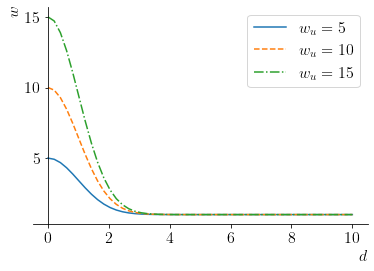

In [10]:
w_u = 10
w_l = 1
sigma = 1
w_us = [5,10,15]
ga_w_wu_fig, ga_w_wu_ax = plt.subplots() 
styles = ['-', '--', '-.']
for i in range(len(w_us)):
    w_u = w_us[i]
    ga_w_wu_ax.plot(xs, [w(x) for x in xs], linestyle=styles[i], label=f"$w_u={w_u}$")

ga_w_wu_ax.legend()
sns.despine(ax=ga_w_wu_ax, offset=0)
ga_w_wu_ax.set_xlabel('$d$', loc='right')
ga_w_wu_ax.set_ylabel(f'$w$', loc='top')
ga_w_wu_ax.spines['left'].set_position('zero')
plt.show()

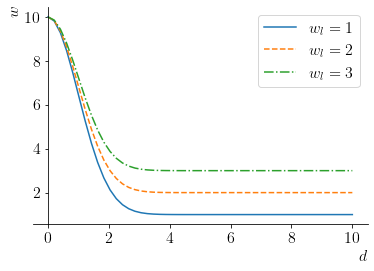

In [11]:
w_u = 10
w_l = 1
sigma = 1
w_ls = [1,2,3]
ga_w_wl_fig, ga_w_wl_ax = plt.subplots() 
styles = ['-', '--', '-.']
for i in range(len(w_ls)):
    w_l = w_ls[i]
    ga_w_wl_ax.plot(xs, [w(x) for x in xs], linestyle=styles[i], label=f"$w_l={w_l}$")

ga_w_wl_ax.legend()
sns.despine(ax=ga_w_wl_ax, offset=0)
ga_w_wl_ax.set_xlabel('$d$', loc='right')
ga_w_wl_ax.set_ylabel(f'$w$', loc='top')
ga_w_wl_ax.spines['left'].set_position('zero')
plt.show()

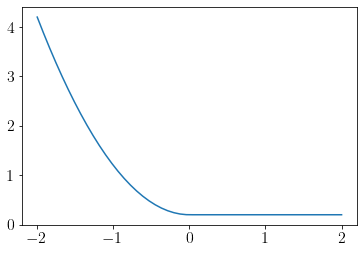

In [ ]:
epsilon = 0.2
u_func = lambda z_dot: epsilon + np.min([0, z_dot])*z_dot
xs = np.linspace(-2,2)
plt.plot(xs, [u_func(x) for x in xs])